In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import xpress as xp
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.preprocessing import StandardScaler
import osmnx as ox
import geopandas as gpd

In [3]:
customer = pd.read_csv('CustomerId.csv').merge(pd.read_csv('CustomerNorthing.csv'), how='inner').merge(pd.read_csv('CustomerEasting.csv'), how='inner')
X = customer[['CustomerNorthing', 'CustomerEasting']].values  # Convert DataFrame to NumPy array


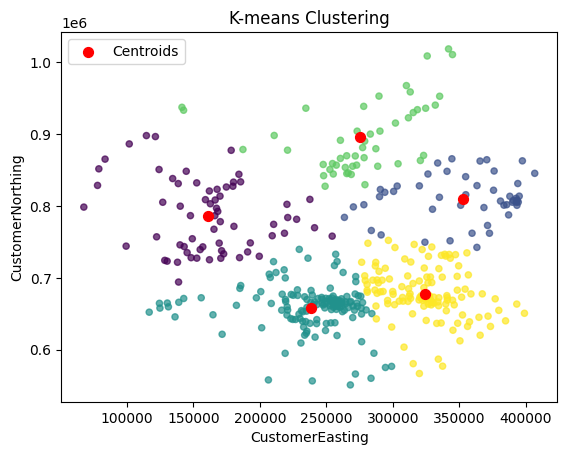

In [4]:
# Parameters for KMeans
init_method = 'random'
n_init = 1  # Number of times the algorithm is run with different random initializations
random_state = 2  # Fixed random seed

# Different values for n_clusters
#n_clusters_list = [5, 10, 20,30, 40, 50, 60, 70, 80, 90, 100, 150, 200]
n_clusters_list = [5]


inertia_values = []

for n_clusters in n_clusters_list:
    # Create KMeans instance
    kmeans = KMeans(n_clusters=n_clusters, init=init_method, n_init=n_init, random_state=random_state)

    # Fit the KMeans algorithm
    kmeans.fit(X)
    
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

    # Get cluster assignments and plot the results
    labels = kmeans.labels_

    plt.scatter(X[:, 1], X[:, 0], c=labels, s=20, alpha=0.7)  # Changed the order of coordinates for scatter plot
    plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], c='red', marker='.', s=200, label='Centroids')  # Changed the order of coordinates for centroids
    plt.title(f'K-means Clustering') # with {n_clusters} clusters')
    plt.xlabel('CustomerEasting')
    plt.ylabel('CustomerNorthing')
    plt.legend()
    plt.show()

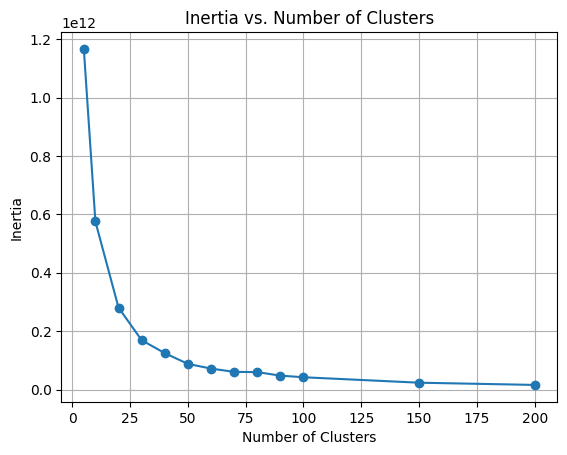

In [9]:
#to run, change cluster array above to n_clusters_list = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200]
plt.plot(n_clusters_list, inertia_values, marker='o')  # Plotting inertia values against number of clusters
plt.title('Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

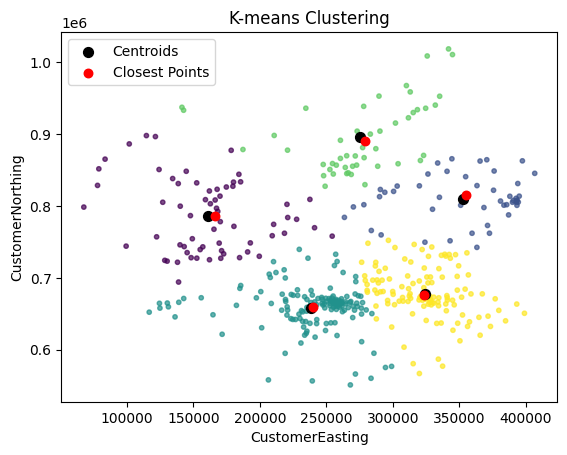

array([[786554, 166216],
       [815718, 354926],
       [660071, 239775],
       [890270, 278920],
       [676544, 323859]])

In [10]:
from matplotlib.colors import ListedColormap

closest_points = []

for cluster_idx in range(n_clusters):
    cluster_points = X[labels == cluster_idx]  # Select points belonging to current cluster
    centroid = kmeans.cluster_centers_[cluster_idx]  # Get centroid of current cluster
    
    # Calculate distances between points in cluster and centroid
    distances = np.linalg.norm(cluster_points - centroid, axis=1)
    
    # Find index of point closest to centroid
    closest_point_idx = np.argmin(distances)
    
    # Get coordinates of closest point
    closest_point_coords = cluster_points[closest_point_idx]
    
    # Append index and coordinates of closest point to list
    closest_points.append(closest_point_coords)

num_clusters = len(np.unique(labels))
colors = plt.cm.viridis(np.linspace(0, 1, num_clusters))  # Using viridis colormap for shades of green
cmap = ListedColormap(colors)

# Plot the data points and centroids
plt.scatter(X[:, 1], X[:, 0], c=labels, s=10, alpha=0.7)  # Changed the order of coordinates for scatter plot
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], c='black', marker='.', s=200, label='Centroids')  # Changed the order of coordinates for centroids

# Plot the closest points
closest_points = np.array(closest_points)
plt.scatter(closest_points[:, 1], closest_points[:, 0], c='red', marker='.', s=150, label='Closest Points')  # Changed the order of coordinates for centroids

plt.title('K-means Clustering')
plt.xlabel('CustomerEasting')
plt.ylabel('CustomerNorthing')
plt.legend()
plt.show()

closest_points

______________________________________________________--

-------------------------------------------------